<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/Digimon_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.5 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 이미지 다운로드 > 파일 정리 > 데이터셋 분리

bing image downloader 받기

In [6]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Receiving objects: 100% (86/86), 17.50 KiB | 2.92 MiB/s, done.
Resolving deltas: 100% (38/38), done.


데이터셋을 저장할 폴더 생성

In [29]:
import os, shutil

directory_list = [
    './dataset/train/',
    './dataset/test/'
]

for dir in directory_list:
    if not os.path.isdir(dir):  #dir에 해당하는 경로가 없다면
        os.makedirs(dir)  #경로에 폴더 생성

In [30]:
from bing_image_downloader.bing_image_downloader import downloader

# query=검색어, limit=다운받을개수, output_dir=이미지 저장할 경로, adult_filter_off=성인콘텐츠필터, force_replace=덮어쓰기, timeout=최대요청시간)
downloader.download(query='아구몬', limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download(query='파닥몬', limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download(query='파피몬', limit=50, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)

# bing_image_downloader는 output_dir의 경로에 query 이름을 가진 폴더를 생성하고, image_1.jpg처럼 1부터 시작하는 숫자를 라벨링함. 확장자는 jpg 고정.

[Info] Indexing page: 1
[Info] Indexed 36 Images on Page 1.
#1 이미지 다운로드 (https://static.zerochan.net/Agumon.full.270526.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://img.chuing.net/g/?id=freeb1&amp;no=41416&amp;num=0&amp;fc=d41d8cd98f00b204e9800998ecf8427e)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://assets.rpgsite.net/images/images/000/055/294/original/agumon.png)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://i.ytimg.com/vi/ukSA9HcYpOU/maxresdefault.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.ytimg.com/vi/3LH_bjaW8f0/maxresdefault.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/a435dfe3-3509-4561-a7cc-8d391524fc39/d5b0mvz-640542f8-33f1-45ab-81ae-887f079e469e.png/v1/fill/w_874,h_914,strp/agumon_by_zeromarusaur_d5b0mvz-pre.png?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMjY0MzczYTVmMGQ0MTVlYTBkMjZlMCIsIm9iaiI6W1t7InBhdGgiOiJcL2ZcL2E0MzVkZmUzL

데이터셋 분리

In [31]:
#수집한 이미지를 학습데이터 평가데이터로 구분하는 함수
def dataset_split(query,train_cnt):

    #
    for dir in directory_list:
        if not os.path.isdir(dir+query):
            os.makedirs(dir+query)

    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'trainset : {file_name}')
            shutil.move(query+'/'+file_name,'./dataset/train/'+query+'/'+file_name)
        else:
            print(f'testset : {file_name}')
            shutil.move(query+'/'+file_name,'./dataset/test/'+query+'/'+file_name)

        cnt += 1

    shutil.rmtree(query)

In [32]:
dataset_split('아구몬',40)
dataset_split('파닥몬',40)
dataset_split('파피몬',40)

trainset : image_26.jpg
trainset : image_10.jpg
trainset : image_40.jpg
trainset : image_36.png
trainset : image_7.jpg
trainset : image_46.jpg
trainset : image_25.png
trainset : image_48.png
trainset : image_33.jpg
trainset : image_22.jpg
trainset : image_11.png
trainset : image_18.jpg
trainset : image_44.jpg
trainset : image_24.jpg
trainset : image_9.jpg
trainset : image_17.jpg
trainset : image_34.png
trainset : image_29.jpg
trainset : image_20.png
trainset : image_19.jpg
trainset : image_43.jpg
trainset : image_6.png
trainset : image_3.png
trainset : image_35.jpg
trainset : image_12.jpg
trainset : image_14.jpg
trainset : image_13.jpg
trainset : image_16.jpg
trainset : image_1.jpg
trainset : image_47.jpg
trainset : image_23.jpg
trainset : image_50.jpg
trainset : image_39.png
trainset : image_8.png
trainset : image_31.png
trainset : image_5.jpg
trainset : image_41.jpg
trainset : image_4.jpg
trainset : image_37.jpg
trainset : image_38.jpg
testset : image_42.jpg
testset : image_30.jpg
te

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [35]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [36]:
train_datasets = datasets.ImageFolder('./dataset/train',transform_train)
test_datasets = datasets.ImageFolder('./dataset/test',transform_test)

In [37]:
train_dataloader = torch.utils.data.DataLoader(train_datasets,shuffle=True,batch_size=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets,shuffle=True,batch_size=4)

In [38]:
print(len(train_datasets))
print(len(test_datasets))

119
31


In [39]:
class_names = train_datasets.classes
print('클래스:', class_names)

클래스: ['아구몬', '파닥몬', '파피몬']


In [40]:
def imshow(img, title):
    print(img.numpy().shape) #tensor를 numpy로 변환
    img = img.numpy().transpose((1,2,0)) #w,h,c

    std = np.array([0.229,0.224,0.225])
    mean = np.array([0.485,0.456,0.406])

    img = std * img + mean
    img = np.clip(img,0,1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

In [41]:
import matplotlib.pyplot as plt

(3, 228, 906)


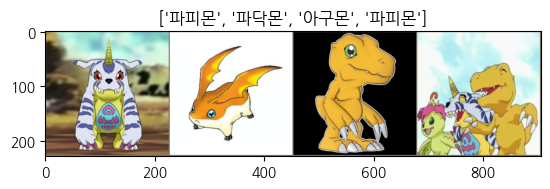

In [42]:
iter_ = iter(train_dataloader)

data, labels = next(iter_)
out = torchvision.utils.make_grid(data)

imshow(out,title=[class_names[x] for x in labels])

In [43]:
model = models.resnet34(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
for param in model.parameters():
    param.requires_grad = False

In [45]:
fc_input_features = model.fc.in_features
fc_input_features

512

In [46]:
model.fc = nn.Linear(fc_input_features, 3)

for name,module in model.named_parameters():
    print(name , module.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2.bias False
layer2.0.downsample.0.weight False
layer2.0.downsample.1.weight False
layer2.0.downsample.1.bias False
layer2.1.conv1.weight False
layer2.1.bn1.weight False
layer2.1.bn1.bias False
layer2.1.conv2.weight False
layer2.1.bn2.weight False
layer2.1.bn2.bias False
layer2.2.conv1.weight False
layer2.2.bn1.weight False
layer2.2.bn1

In [47]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model.to(device)
start_time = time.time()
for epoch in range(50):
    for data,labels in train_dataloader:
        optimizer.zero_grad()
        preds = model(data.to(device))
        loss = nn.CrossEntropyLoss()(preds,labels.to(device))
        loss.backward()
        optimizer.step()

    print(f'epoch : {epoch+1} loss : {loss.item()} time : {time.time() - start_time}')


epoch : 1 loss : 1.1602851152420044 time : 13.905745267868042
epoch : 2 loss : 1.0937849283218384 time : 18.96009397506714
epoch : 3 loss : 1.0776728391647339 time : 22.625585794448853
epoch : 4 loss : 1.181178331375122 time : 25.868908405303955
epoch : 5 loss : 1.0958338975906372 time : 31.651823043823242
epoch : 6 loss : 1.092556357383728 time : 35.27847695350647
epoch : 7 loss : 1.1458407640457153 time : 38.86673665046692
epoch : 8 loss : 0.8871071934700012 time : 43.43769574165344
epoch : 9 loss : 1.2590688467025757 time : 46.6493501663208
epoch : 10 loss : 0.7608940005302429 time : 49.74946165084839
epoch : 11 loss : 0.9099436402320862 time : 53.36606788635254
epoch : 12 loss : 1.101807713508606 time : 56.61390829086304
epoch : 13 loss : 1.1054012775421143 time : 59.69133448600769
epoch : 14 loss : 0.9687445759773254 time : 63.16729807853699
epoch : 15 loss : 1.1685009002685547 time : 66.96631455421448
epoch : 16 loss : 0.7687427401542664 time : 70.05599999427795
epoch : 17 loss :

예측결과 : 아구몬  실제정답 : 파닥몬
(3, 224, 224)


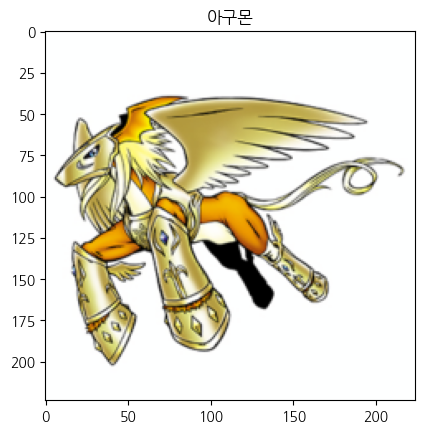

예측결과 : 아구몬  실제정답 : 아구몬
(3, 224, 224)


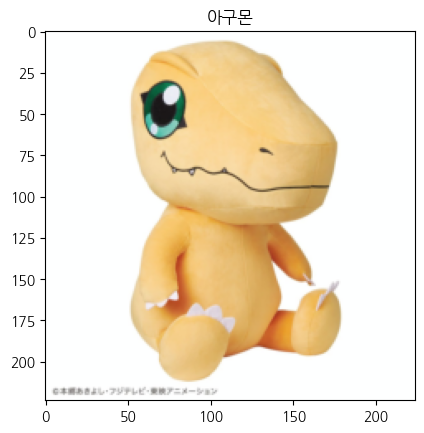

예측결과 : 파닥몬  실제정답 : 파닥몬
(3, 224, 224)


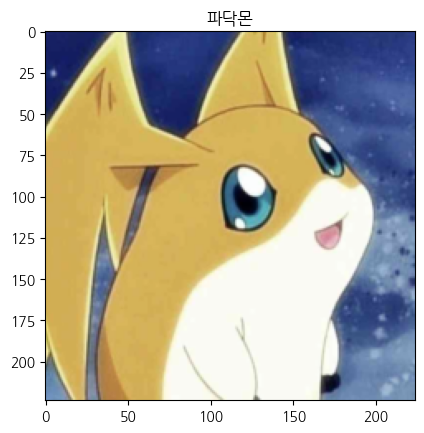

예측결과 : 파피몬  실제정답 : 파피몬
(3, 224, 224)


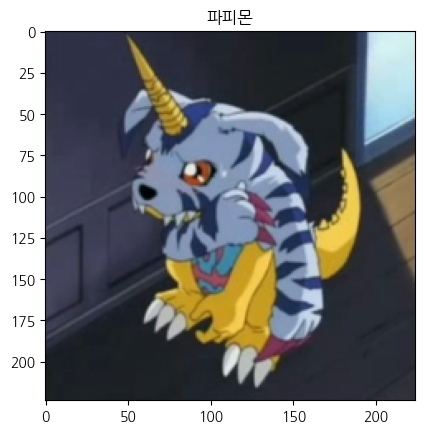

예측결과 : 파피몬  실제정답 : 파피몬
(3, 224, 224)


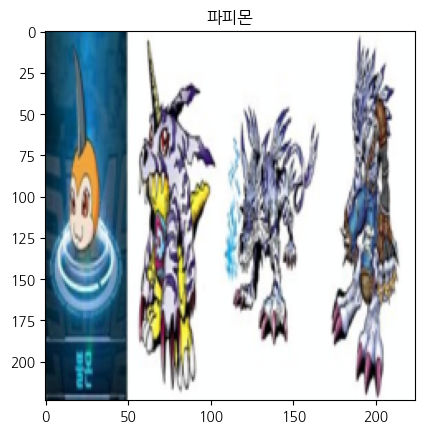

예측결과 : 파닥몬  실제정답 : 파닥몬
(3, 224, 224)


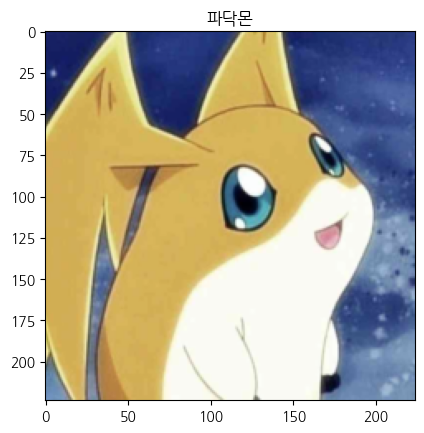

예측결과 : 아구몬  실제정답 : 아구몬
(3, 224, 224)


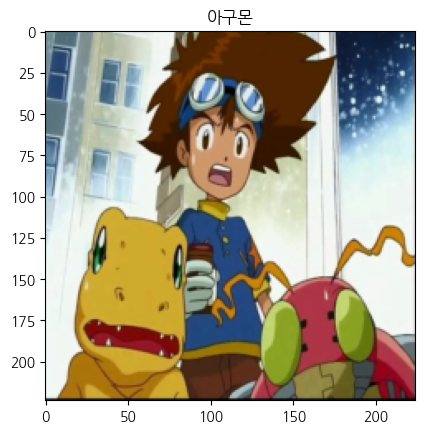

예측결과 : 파피몬  실제정답 : 파피몬
(3, 224, 224)


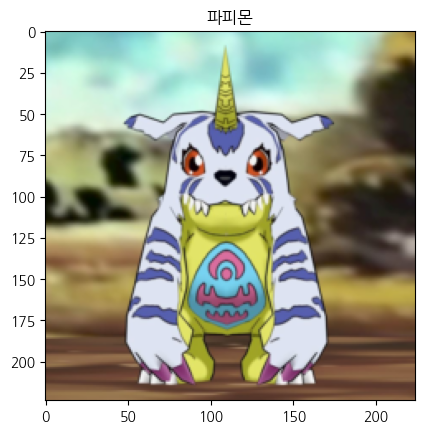

정확도 : 80.64515686035156


In [48]:
model.eval()
with torch.no_grad():
    corrects = 0
    for data,labels in test_dataloader:
        preds = model(data.to(device))
        pred = torch.max(preds,1)[1]

        corrects += torch.sum(pred == labels.to(device).data)

        print(f'예측결과 : {class_names[pred[0]]}  실제정답 : {class_names[labels.data[0]]}')
        imshow(data.cpu().data[0], title=class_names[pred[0]])

    acc = corrects / len(test_datasets) * 100
    print(f'정확도 : {acc}')

In [49]:
#torch.save(model, 'model.pt')  # 전체 모델 저장
torch.save(model.state_dict(), 'digimon_classification_resnet34.pt')